In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/Users/anudeepshukla/Downloads/seaborn-data-master/taxis.csv")
print(data.head(2))

                pickup              dropoff  passengers  distance  fare   tip  \
0  2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0  2.15   
1  2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0  0.00   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  


<Axes: xlabel='fare'>

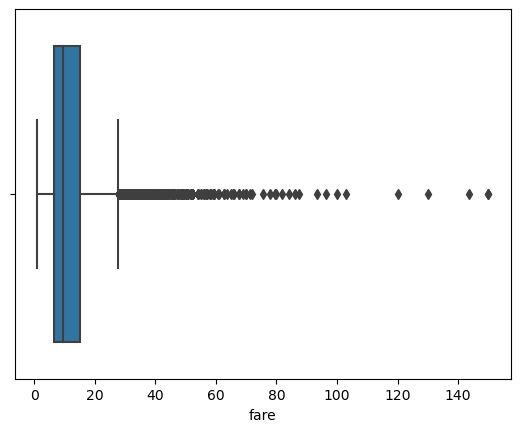

In [4]:
sns.boxplot(x=data['fare'])

In [5]:
data['fare'].quantile()

9.5

-6.25
27.75


<Axes: xlabel='farenew'>

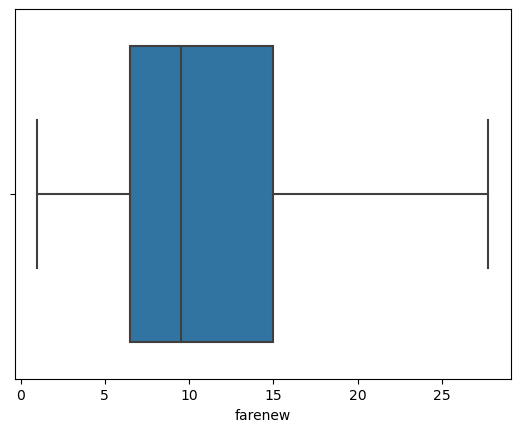

In [6]:
Q3 = data['fare'].quantile(q=0.75)
Q3
Q1 = data['fare'].quantile(q=0.25)
Q1
IQR = Q3 - Q1
IQR
Lower = Q1 - (1.5*IQR)
print(Lower)
Upper = Q3 + (1.5*IQR)
print(Upper)
data[data['fare']>Upper]
data['farenew'] = np.where(data['fare']>Upper,Upper,data['fare'])
data.head(2)
sns.boxplot(x=data['farenew'])

<Axes: xlabel='tip'>

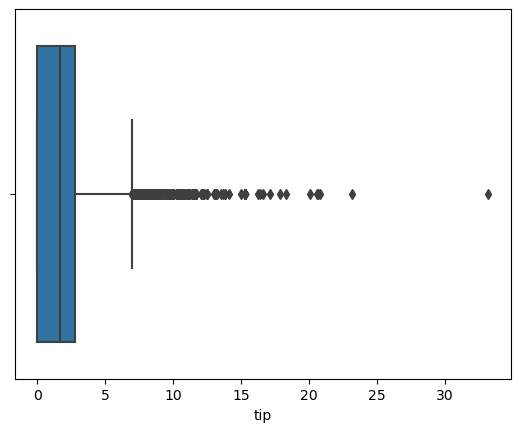

In [7]:
sns.boxplot(x=data['tip'])


-4.199999999999999
6.999999999999999


<Axes: xlabel='tipnew'>

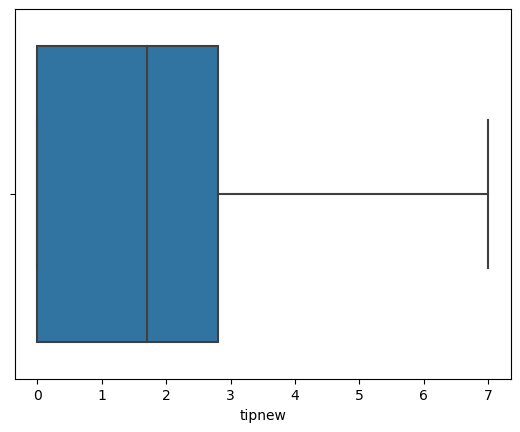

In [8]:
Q3 = data['tip'].quantile(q=0.75)
Q3
Q1 = data['tip'].quantile(q=0.25)
Q1
IQR = Q3 - Q1
IQR
Lower = Q1 - (1.5*IQR)
print(Lower)
Upper = Q3 + (1.5*IQR)
print(Upper)
data[data['tip']>Upper]
data['tipnew'] = np.where(data['tip']>Upper,Upper,data['tip'])
data.head(2)
sns.boxplot(x=data['tipnew'])

<Axes: xlabel='tipnew'>

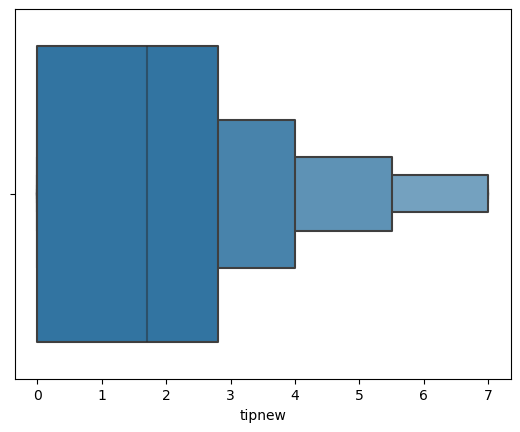

In [9]:
sns.boxenplot(x=data['tipnew'])

In [10]:
data.describe()

,passengers,distance,fare,tip,tolls,total,farenew,tipnew
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,11.730843,1.833852
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570,7.156878,1.900430
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,1.000000,0.000000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,6.500000,0.000000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,9.500000,1.700000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,15.000000,2.800000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000,27.750000,7.000000


3.217462794607763


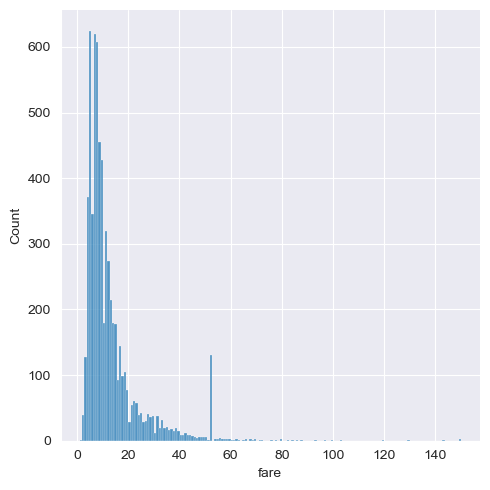

In [11]:
sns.set_style('darkgrid')
sns.displot(x=data['fare'])
print(data['fare'].skew())

2.665151563396707


/var/folders/vg/hx01p1r944qfyb05d_n5l4dh0000gn/T/ipykernel_30137/2272132741.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['tip'])


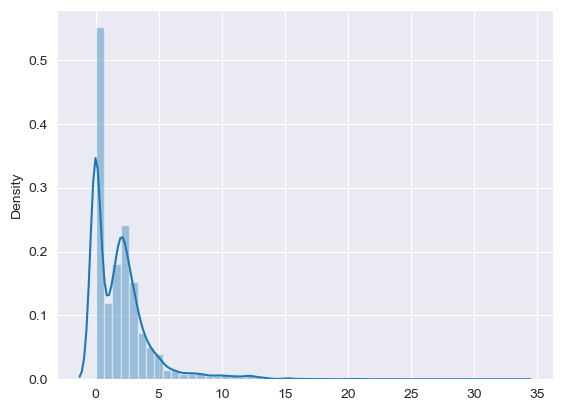

In [12]:
sns.distplot(x=data['tip'])
print(data['tip'].skew())

3.217462794607763


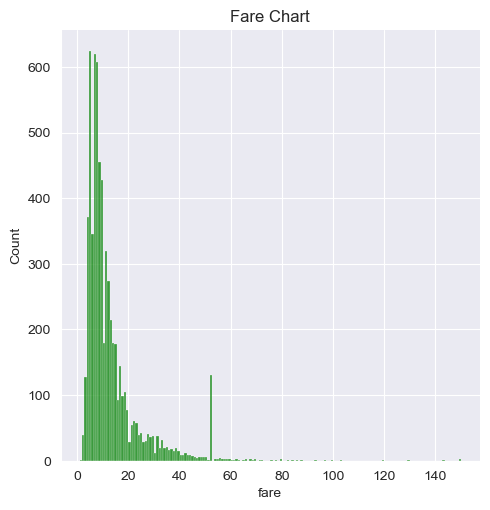

In [13]:
sns.set_style('darkgrid')
ax = sns.displot(x=data['fare'],color='green')
plt.title("Fare Chart")
print(data['fare'].skew())

2.665151563396707


<Figure size 2200x1000 with 0 Axes>

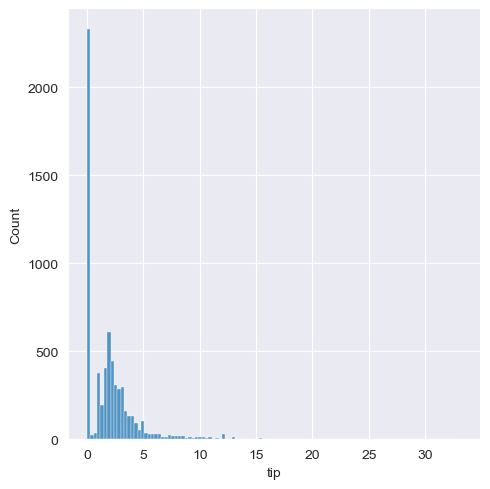

In [14]:
plt.figure(figsize=(22,10))
sns.displot(x=data['tip'])
print(data['tip'].skew())

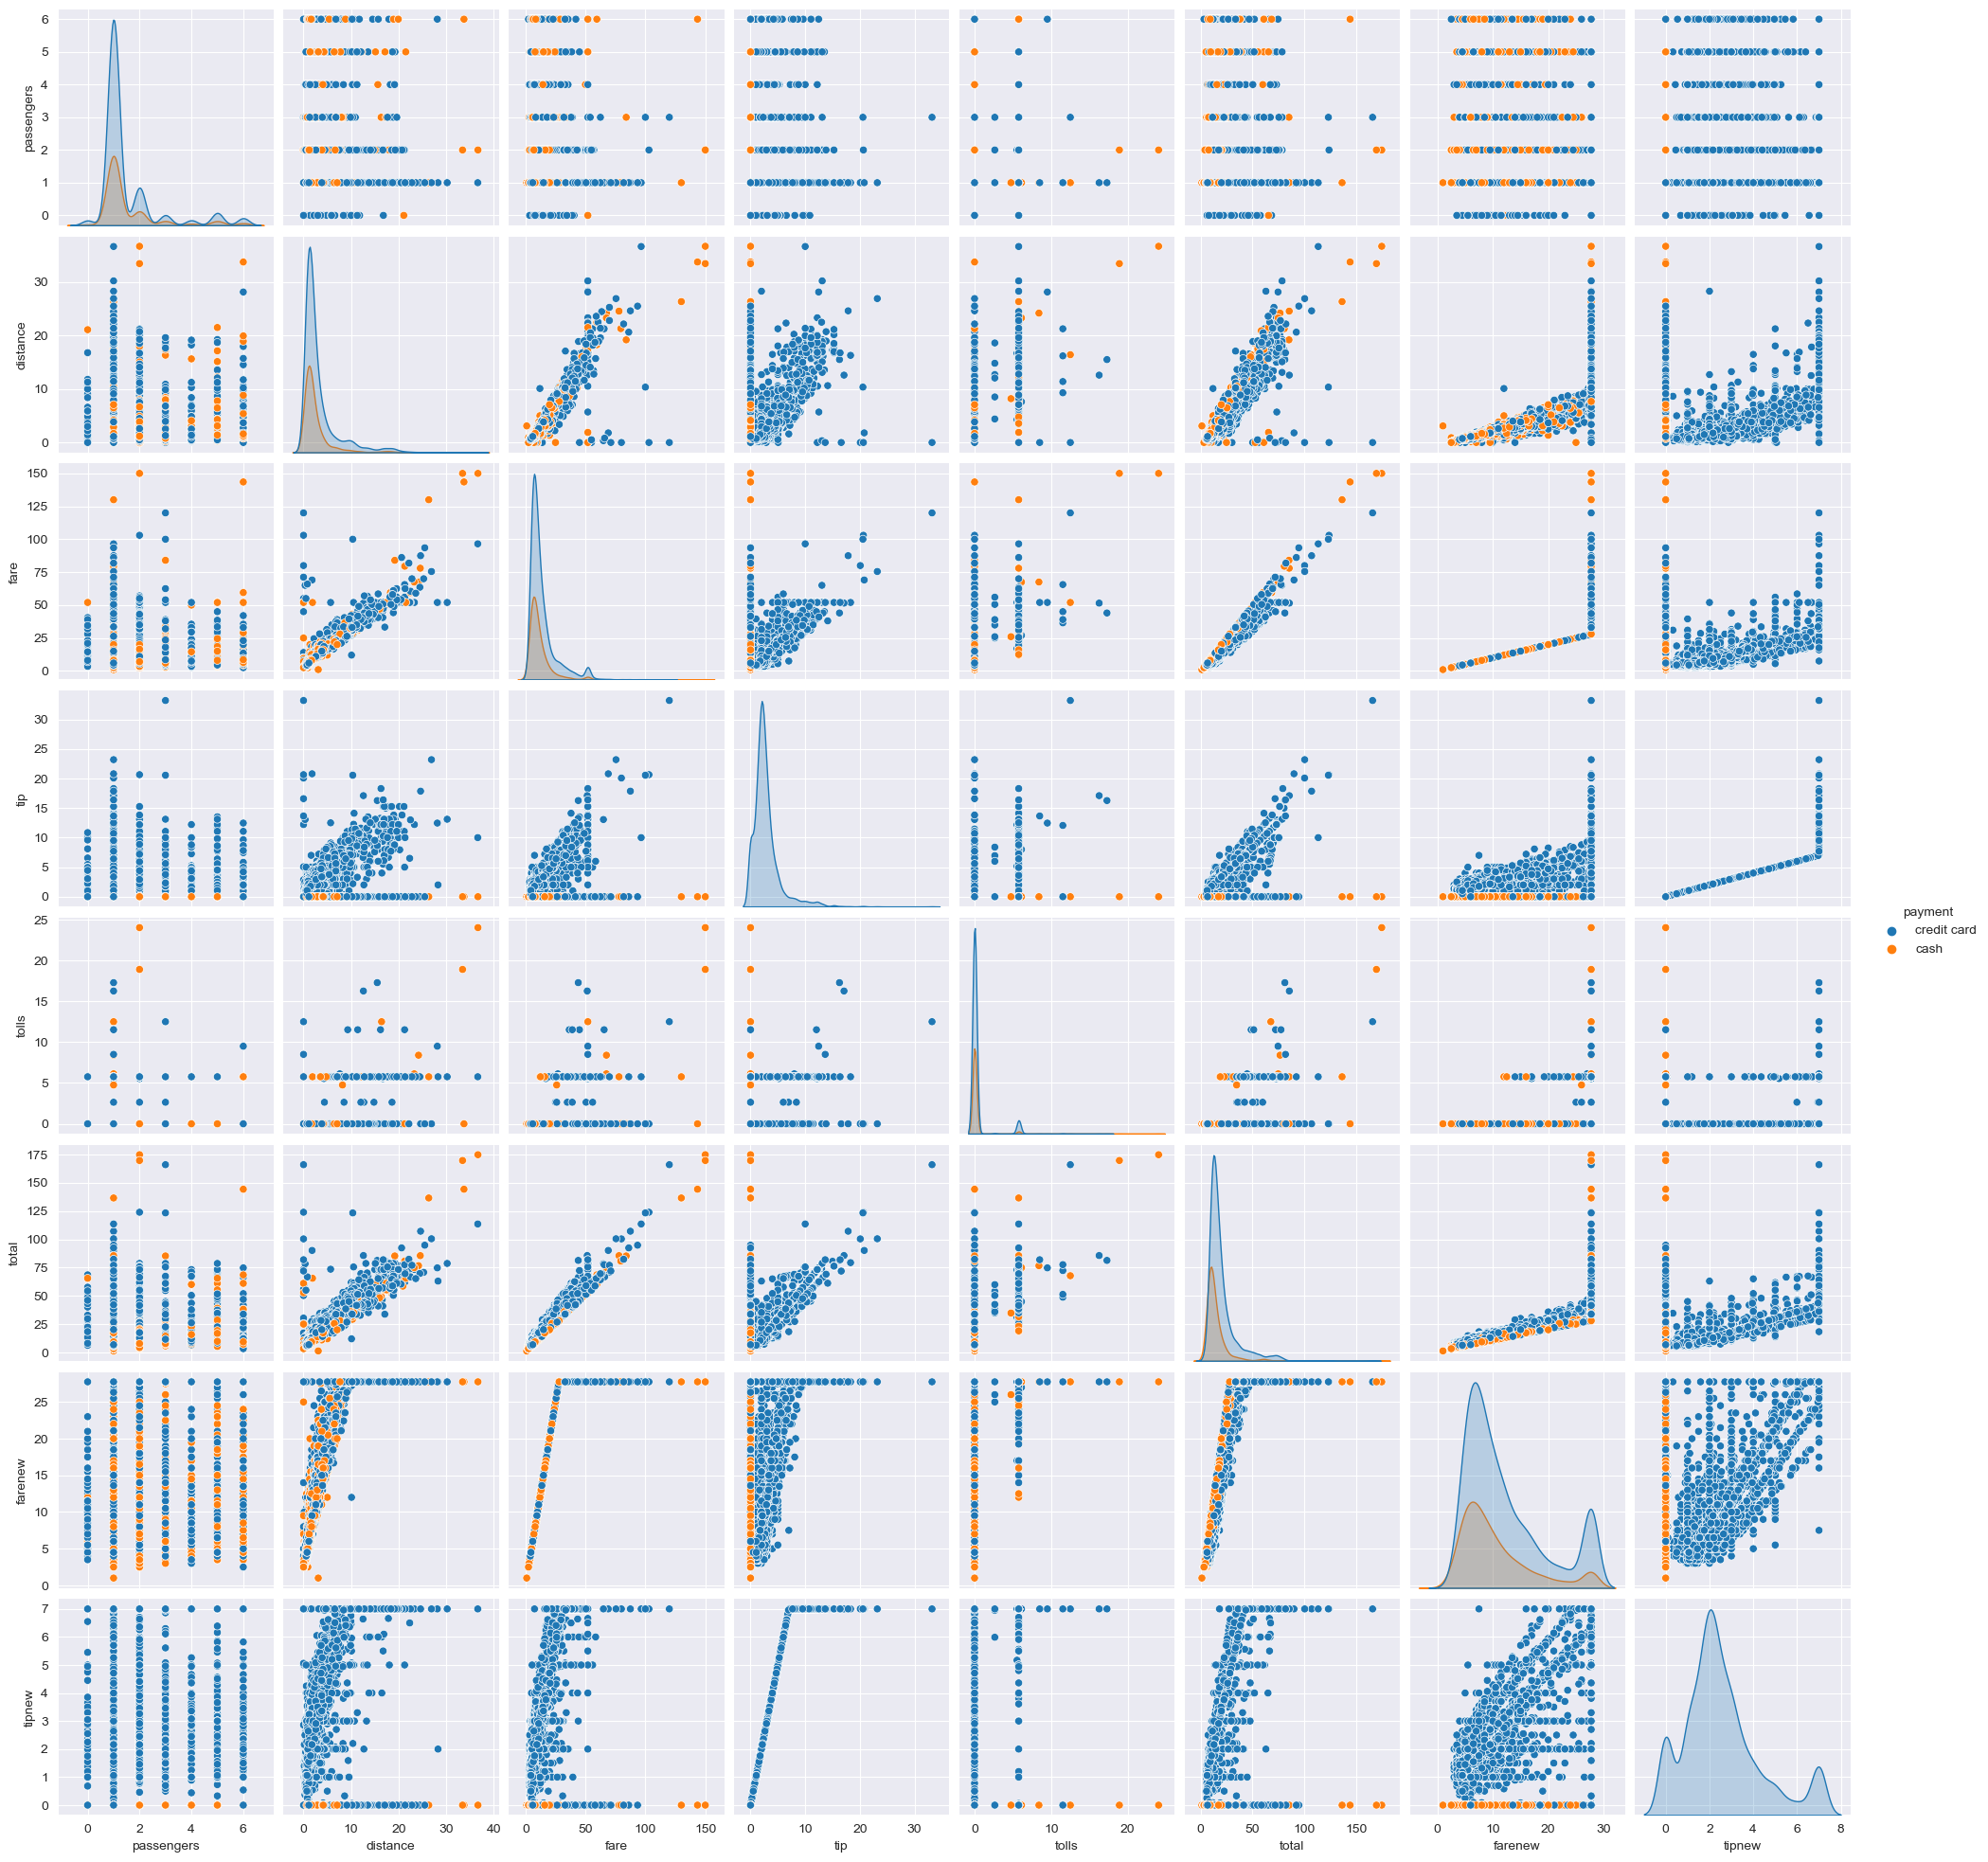

In [16]:
sns.pairplot(data,hue='payment')

/var/folders/vg/hx01p1r944qfyb05d_n5l4dh0000gn/T/ipykernel_30137/316118802.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True,cmap = 'RdBu')


<Axes: >

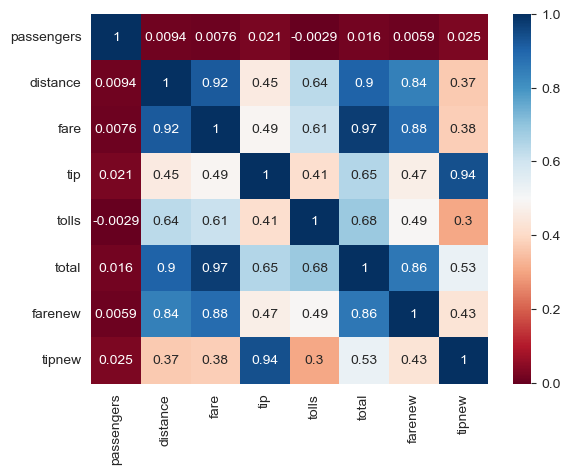

In [17]:
sns.heatmap(data.corr(),annot = True,cmap = 'RdBu')

<Axes: xlabel='payment', ylabel='fare'>

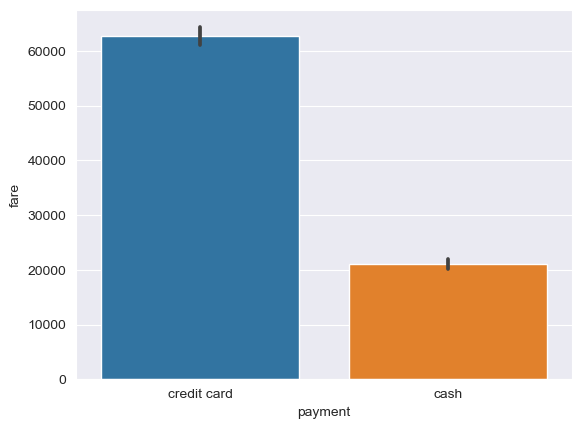

In [21]:
sns.barplot(x = 'payment',y = 'fare',data = data,estimator='sum')

<Axes: xlabel='fare', ylabel='payment'>

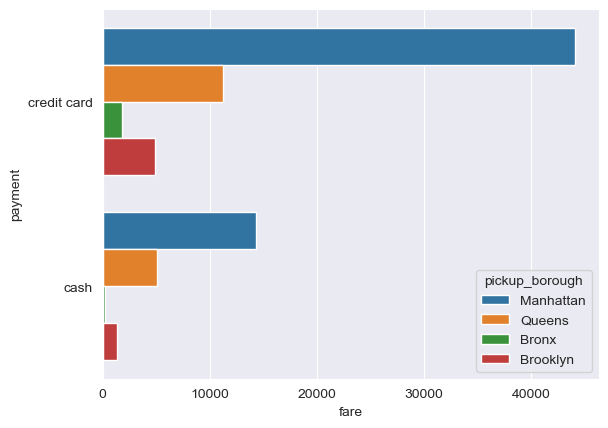

In [25]:
sns.barplot(y = 'payment',x = 'fare',hue = 'pickup_borough',data = data,estimator='sum',errorbar=None)

<Axes: xlabel='fare', ylabel='tip'>

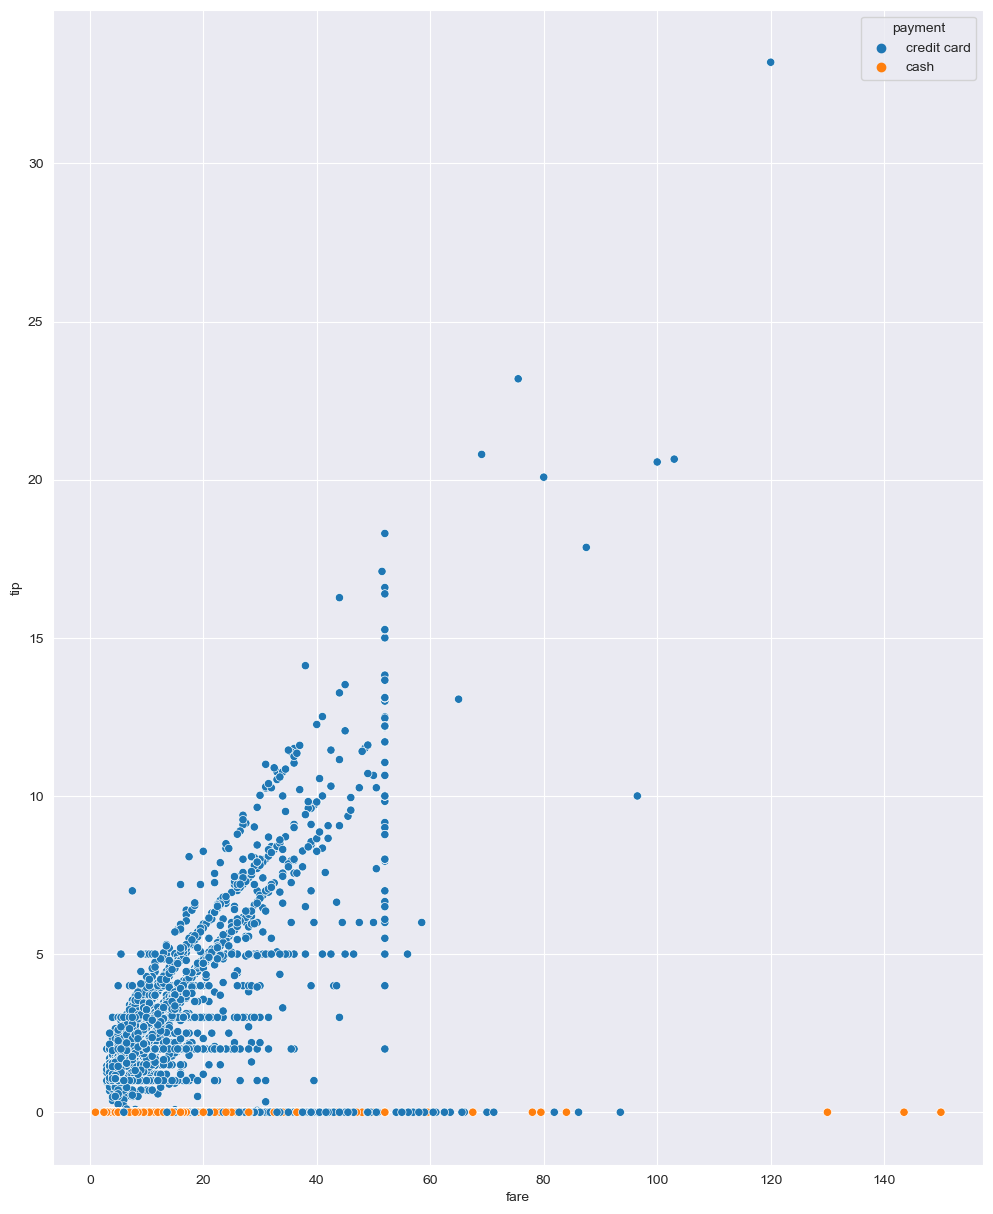

In [26]:
plt.figure(figsize = (12,15))
sns.scatterplot(x = 'fare',y = 'tip',data = data,hue = 'payment')

In [33]:
data.pivot_table(values = 'fare', columns = ['payment','color'],index = 'total',aggfunc = 'mean')

payment      cash          credit card       
color       green   yellow       green yellow
total                                        
1.30          NaN    1.000         NaN    NaN
3.30       2.5000    2.500         2.5    2.5
3.31          NaN      NaN         NaN    2.5
3.80       2.8750    2.625         3.0    NaN
4.30       3.1875    2.875         3.5    2.5
...           ...      ...         ...    ...
136.56        NaN  130.000         NaN    NaN
144.30        NaN  143.500         NaN    NaN
166.00        NaN      NaN         NaN  120.0
169.70   150.0000      NaN         NaN    NaN
174.82        NaN  150.000         NaN    NaN

[897 rows x 4 columns]

<Axes: xlabel='payment,pickup_borough'>

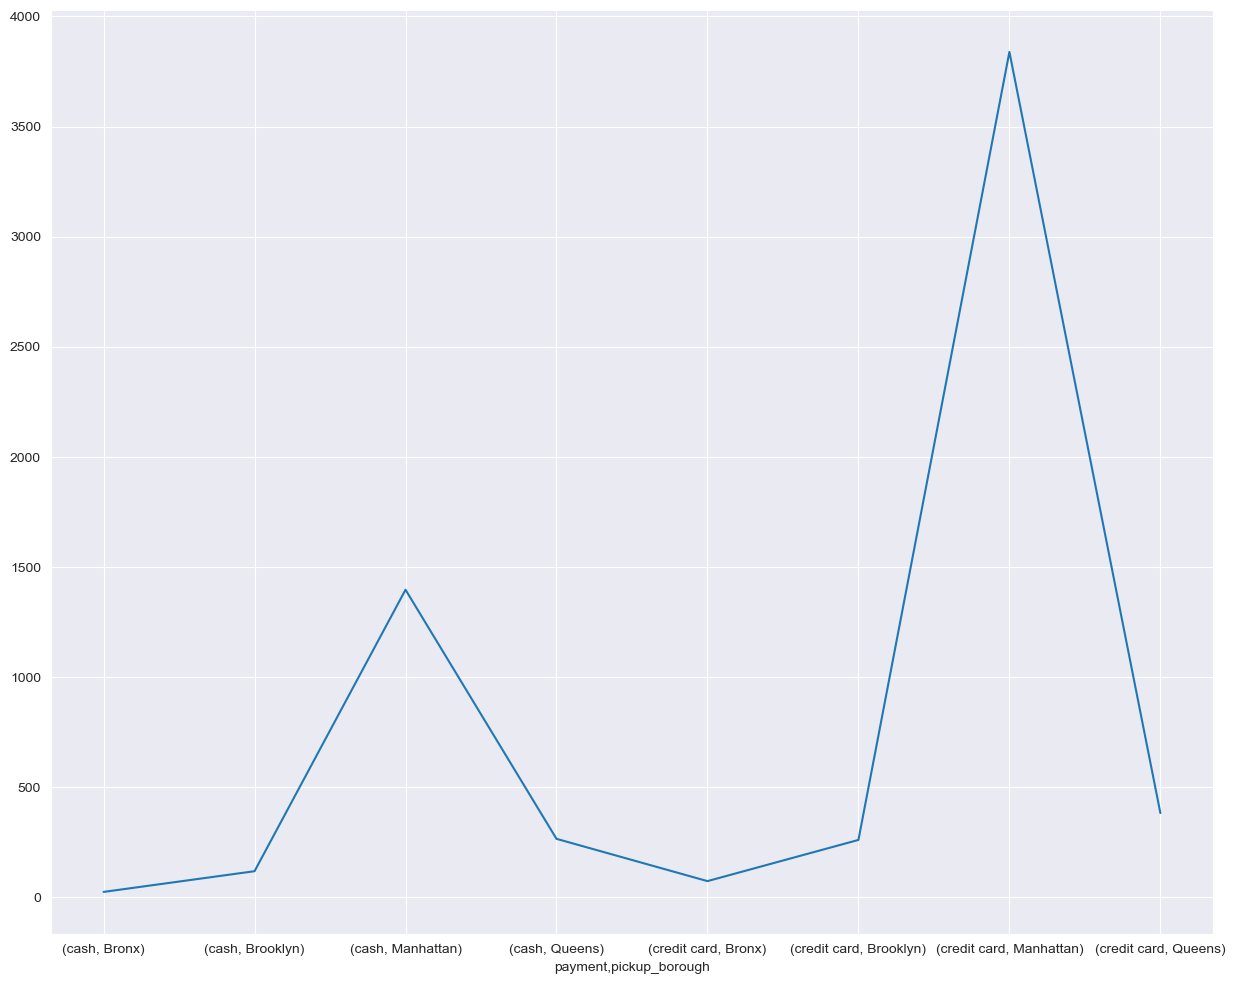

In [37]:
plt.figure(figsize = (15,12))
data.groupby(['payment','pickup_borough']).size().plot()